In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,NaN,-0.37708,NaN,0.03760,...,0.56811,-0.51171,NaN,-0.46168,0.21266,-0.34090,0.42267,-0.54487,NaN,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	0
float64		column 4	0
float64		column 5	0
float64		column 6	0
float64		column 7	18
float64		column 8	0
float64		column 9	55
float64		column 10	0
float64		column 11	55
float64		column 12	0
float64		column 13	73
float64		column 14	0
float64		column 15	37
float64		column 16	0
float64		column 17	18
float64		column 18	0
float64		column 19	73
float64		column 20	0
float64		column 21	73
float64		column 22	19
float64		column 23	18
float64		column 24	0
float64		column 25	18
float64		column 26	0
float64		column 27	18
float64		column 28	0
float64		column 29	36
float64		column 30	0
float64		column 31	18
float64		column 32	0
float64		column 33	55
float64		column 34	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,333.000000,351.000000,296.000000,351.000000,...,333.000000,351.000000,333.000000,351.000000,315.000000,351.000000,333.000000,351.000000,296.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.549997,0.119360,0.495978,0.181345,...,0.402971,-0.071187,0.558530,-0.069538,0.382829,-0.027907,0.350150,-0.003794,0.377590,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492457,0.520750,0.506999,0.483851,...,0.574205,0.508495,0.506704,0.550025,0.574846,0.507974,0.569166,0.513574,0.511129,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.206900,-0.054840,0.058033,-0.048075,...,0.000000,-0.332390,0.334010,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.662970,0.018290,...,0.559840,-0.015050,0.721470,-0.017690,0.513840,0.000000,0.441410,0.000000,0.450720,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.971650,0.445675,0.930690,0.534195,...,0.909090,0.156765,1.000000,0.153535,0.898245,0.154075,0.851980,0.200120,0.823482,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

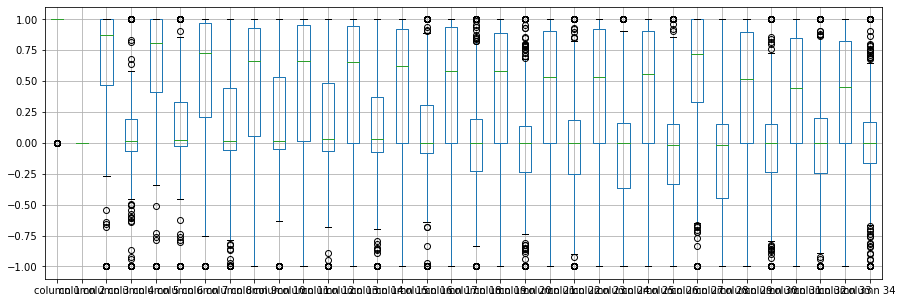

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.641342
column 4     0.044372
column 5     0.601068
column 6     0.115889
column 7     0.549997
column 8     0.119360
column 9     0.495978
column 10    0.181345
column 11    0.478212
column 12    0.155040
column 13    0.405726
column 14    0.093414
column 15    0.353187
column 16    0.071132
column 17    0.382366
column 18   -0.003617
column 19    0.354158
column 20   -0.024025
column 21    0.355631
column 22    0.000499
column 23    0.370443
column 24   -0.057406
column 25    0.402971
column 26   -0.071187
column 27    0.558530
column 28   -0.069538
column 29    0.382829
column 30   -0.027907
column 31    0.350150
column 32   -0.003794
column 33    0.377590
column 34    0.014480
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.302034,-0.006529,0.156152,0.127606,0.192742,0.027079,0.219866,-0.051883,...,-0.001501,0.149789,-0.189101,-0.010725,0.135291,-0.121415,0.184205,-0.100914,0.199013,0.010788
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.302034,NaN,1.000000,0.143365,0.476587,0.025768,0.460332,0.008717,0.511080,0.047916,...,0.295424,-0.073202,0.046336,0.123345,0.330170,0.057890,0.250353,-0.009332,0.278424,0.000584
column 4,-0.006529,NaN,0.143365,1.000000,0.001152,-0.190308,-0.087154,0.255003,-0.278850,0.207697,...,-0.115811,-0.236987,-0.053435,0.000743,-0.079351,0.342301,-0.187252,-0.122788,-0.162092,0.034608
column 5,0.156152,NaN,0.476587,0.001152,1.000000,0.038323,0.626235,-0.029794,0.480871,-0.034236,...,0.209716,-0.032254,0.134036,0.184517,0.275132,0.051068,0.383053,0.025681,0.395537,-0.099478
column 6,0.127606,NaN,0.025768,-0.190308,0.038323,1.000000,0.010785,0.274747,-0.141134,0.200080,...,-0.182600,0.041787,-0.189188,-0.068775,-0.036771,-0.158090,-0.085073,0.316802,0.011823,0.185215
column 7,0.192742,NaN,0.460332,-0.087154,0.626235,0.010785,1.000000,-0.181162,0.519234,-0.103652,...,0.273959,0.070650,0.118653,0.099306,0.315451,-0.045302,0.432799,-0.012978,0.625579,-0.104990
column 8,0.027079,NaN,0.008717,0.255003,-0.029794,0.274747,-0.181162,1.000000,-0.317429,0.373567,...,-0.183705,-0.133023,-0.265998,0.072373,-0.172933,0.078585,-0.164012,0.152381,-0.170394,0.360610
column 9,0.219866,NaN,0.511080,-0.278850,0.480871,-0.141134,0.519234,-0.317429,1.000000,-0.239989,...,0.429734,0.050861,0.172262,0.170212,0.415891,-0.012262,0.380801,-0.093878,0.376158,-0.055736
column 10,-0.051883,NaN,0.047916,0.207697,-0.034236,0.200080,-0.103652,0.373567,-0.239989,1.000000,...,-0.243673,-0.043680,-0.249349,0.072018,-0.126443,-0.008578,-0.152168,-0.015640,-0.176805,0.098104


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+8,34+8+8,34+8+8+8,34+8+8+8+8,34+8+8+8,34+8+8,34+8,34], vae_layer = False, seed = 80)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 19.186658541361492
Epoch: 1 , loss: 19.207771846226283
Epoch: 2 , loss: 19.101790201096307
Epoch: 3 , loss: 19.134110677809943
Epoch: 4 , loss: 19.126563026791526
Epoch: 5 , loss: 19.072249821254186
Epoch: 6 , loss: 19.054270880562918
Epoch: 7 , loss: 18.99964105515253
Epoch: 8 , loss: 18.927387464614142
Epoch: 9 , loss: 18.964429946172807
Epoch: 10 , loss: 18.88773772830055
Epoch: 11 , loss: 18.82803644452776
Epoch: 12 , loss: 18.693539210728236
Epoch: 13 , loss: 18.746572676159087
Epoch: 14 , loss: 18.589157921927317
Epoch: 15 , loss: 18.362887700398762
Epoch: 16 , loss: 18.217052777608234
Epoch: 17 , loss: 18.120462463015603
Epoch: 18 , loss: 17.909351530529204
Epoch: 19 , loss: 17.626163028535387
Epoch: 20 , loss: 17.105434644789923
Epoch: 21 , loss: 16.735708781651088
Epoch: 22 , loss: 16.591883886428107
Epoch: 23 , loss: 16.434875352042063
Epoch: 24 , loss: 16.42921801975795
Epoch: 25 , loss: 16.

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.0,0.0,0.0,0.0,-0.521299,0.0,-0.716497,0.0,...,0.0,0.0,-0.097831,0.0,0.0,0.0,0.0,0.0,0.033964,0.0
1,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
347,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
348,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
349,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

14.361733110573658

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.20978231952434268

In [19]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.312681,-0.37708,0.283503,0.03760,...,0.56811,-0.51171,0.312949,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.220374,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.108680,-0.93597,1.000000,-0.04549,...,-0.20332,-0.26569,-0.204680,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.137380,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.000000,-0.12062,0.889650,0.01198,...,0.57528,-0.40220,0.589840,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.560450,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.712160,-1.00000,0.000000,0.00000,...,1.00000,0.90695,0.516130,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.323820,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.921060,-0.23255,0.771520,-0.16399,...,0.03286,-0.65158,0.132900,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.046080,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.843490,-0.05567,0.904410,-0.04622,...,0.95378,-0.04202,0.834790,0.00123,1.00000,0.12815,0.86660,-0.10714,0.905460,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.934380,-0.01920,0.945900,0.01606,...,0.94520,0.01361,0.935220,0.04925,0.93159,0.08168,0.94066,-0.00035,0.914830,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.951770,-0.03431,0.955840,0.02446,...,0.93988,0.03193,0.924890,0.02542,0.92120,0.02242,0.92459,0.00442,0.926970,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.956910,-0.03646,0.857460,0.00110,...,0.91050,-0.02099,0.891470,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.874030,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_AL_5(imp).xlsx", index=False, header=False)